# Importing Libraries


In [1]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


In [2]:
DATASET_DIR = Path(r'C:\Users\kisho\Downloads\Aeiral object detection project\Data\classification_dataset')
IMG_SIZE = (224, 224)     # Standard size for models like EfficientNet/MobileNet
BATCH_SIZE = 32


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Scale pixels from 0–255 → 0–1
    rotation_range=20,          # Random rotation
    width_shift_range=0.1,      # Horizontal shift
    height_shift_range=0.1,     # Vertical shift
    zoom_range=0.15,            # Random zoom in/out
    horizontal_flip=True,       # Flip image
    brightness_range=[0.7,1.3], # Random brightness change
)


In [4]:
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
train_generator = train_datagen.flow_from_directory(
    DATASET_DIR /"train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

valid_generator = test_val_datagen.flow_from_directory(
    DATASET_DIR / "valid",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_generator = test_val_datagen.flow_from_directory(
    DATASET_DIR / "test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False   # Important for evaluation later
)


Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


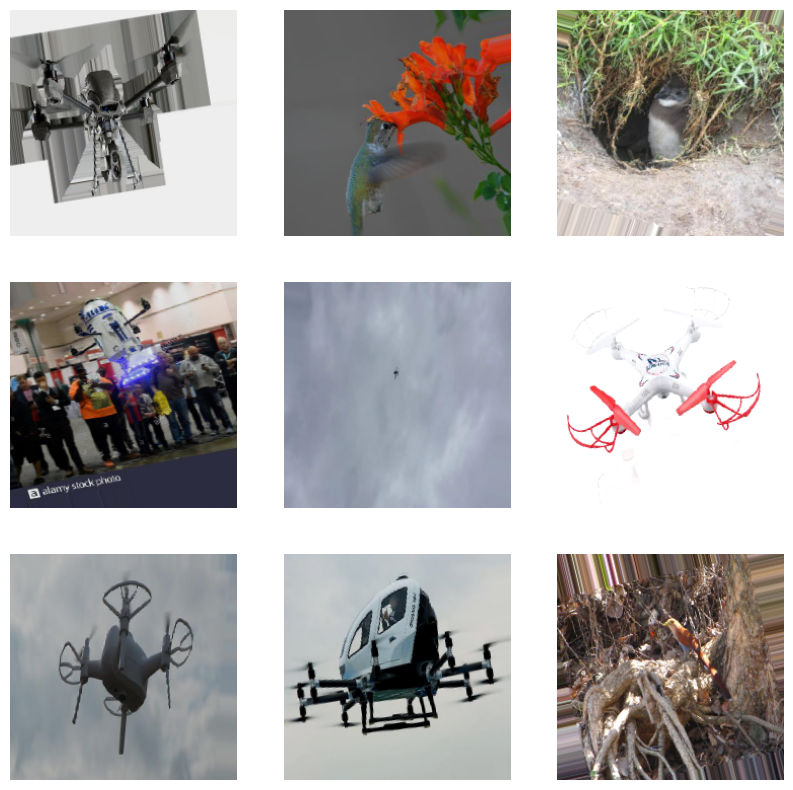

In [6]:
imgs, labels = next(train_generator)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(imgs[i])
    plt.axis("off")
plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

def get_dataloaders(data_dir, img_size=(224,224), batch_size=32):
    
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.15,
        horizontal_flip=True,
        brightness_range=[0.7,1.3]
    )

    test_val_datagen = ImageDataGenerator(rescale=1./255)
    
    train_gen = train_datagen.flow_from_directory(
        Path(data_dir) / "train",
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary"
    )

    val_gen = test_val_datagen.flow_from_directory(
        Path(data_dir) / "valid",
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary"
    )

    test_gen = test_val_datagen.flow_from_directory(
        Path(data_dir) / "test",
        target_size=img_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )

    return train_gen, val_gen, test_gen
